<a href="https://colab.research.google.com/github/lauren-safwat/Dry-Beans-Classification/blob/main/Dry_Beans_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dry Beans Classification**
- Seed quality is definitely influential in crop production. Therefore, seed classification is essential for both marketing and production to provide the principles of sustainable agricultural systems.

- In this notbook we try different algorithms to classify the most well-known 7 types of beans in Turkey; Barbunya, Bombay, Cali, Dermason, Horoz, Seker and Sira, depending ONLY on dimension and shape features of bean varieties with no external discriminatory features.

#### **Required Packages**

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import QuantileTransformer, RobustScaler

from sklearn.metrics import f1_score, accuracy_score, confusion_matrix , classification_report
from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

sns.set_style("darkgrid")

#### **Data fields**
- **ID**: An ID for this instance
- **Area (A)**: The area of a bean zone and the number of pixels within its boundaries.
- **Perimeter (P)**: Bean circumference is defined as the length of its border.
- **MajorAxisLength (L)**: The distance between the ends of the longest line that can be drawn from a bean.
- **MinorAxisLength (l)**: The longest line that can be drawn from the bean while standing perpendicular to the main axis.
- **AspectRatio (K)**: Defines the relationship between L and l.
- **Eccentricity (Ec)**: Eccentricity of the ellipse having the same moments as the region.
- **ConvexArea (C)**: Number of pixels in the smallest convex polygon that can contain the area of a bean seed.
- **EquivDiameter (Ed)**: The diameter of a circle having the same area as a bean seed area.
- **Extent (Ex)**: The ratio of the pixels in the bounding box to the bean area.
- **Solidity (S)**: Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.
- **Roundness (R)**: Calculated with the following formula: (4 pi A)/(P^2)
- **Compactness (CO)**: Measures the roundness of an object: Ed/L
- **ShapeFactor1 (SF1)**: L/d
- **ShapeFactor2 (SF2)**: l/d
- **ShapeFactor3 (SF3)**: 4A/(L^2 * pi)
- **ShapeFactor4 (SF4)**: 4A/(L l pi)
- **y**: The class of the bean. It can be any of BARBUNYA, SIRA, HOROZ, DERMASON, CALI, BOMBAY, and SEKER.

#### **Read Data**

In [22]:
train_data = pd.read_csv("https://raw.githubusercontent.com/lauren-safwat/Dry-Beans-Classification/main/dataset/train_data.csv?token=GHSAT0AAAAAABT3JWLRWOMWID4DPRQNFPUAYUCZ3OA", index_col='ID')
test_data = pd.read_csv("https://raw.githubusercontent.com/lauren-safwat/Dry-Beans-Classification/main/dataset/test_data.csv?token=GHSAT0AAAAAABT3JWLQA2EUIIMGDBIYN2OUYUCZ25Q", index_col='ID')

In [ ]:
train_data.head(5)

### **EDA**

#### 1. Data shape and columns

In [ ]:
print("Data Shape: ", train_data.shape)

In [ ]:
print("Data Columns: ", list(train_data.columns))

#### 2. Data Summary and Information

In [ ]:
train_data.describe().T

In [ ]:
train_data.info()

#### 3. Split data into features and labels

In [28]:
y = train_data[['y']]
X = train_data.drop('y', axis=1)

#### 4. Data Visualization

* ##### Distribution of target column

In [ ]:
plt.figure(figsize=(10, 7))
plt.title('Distribution of Dry Beans Types')
ax = sns.countplot(x=y.y, order=y.y.value_counts(ascending=False).index)

for p in ax.patches:
    x_ = p.get_bbox().get_points()[:,0]
    y_ = p.get_bbox().get_points()[1,1]
    ax.annotate(p.get_height(), (x_.mean(), y_), ha='center', va='bottom')

plt.show()

* ##### Boxplot of numerical features for each type of bean

In [ ]:
fig, ax = plt.subplots(4, 2, figsize=(25, 30))

for variable, subplot in zip(X.columns, ax.flatten()):
    sns.boxplot(x=y.y, y=X[variable], ax=subplot)
plt.tight_layout()

* ##### Outliers Identification

In [ ]:
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
LB = Q1 - 1.5 * IQR
UB = Q3 + 1.5 * IQR
nOutliers = X[(X < LB) | (X > UB)].count()
nOutliers

In [ ]:
f, axs = plt.subplots(figsize=(20, 20))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

for i, column in enumerate(X.columns, 1):
  plt.subplot(6, 3, i)
  sns.boxplot(X[column])

* ##### Skewness Identification

In [ ]:
f, axs = plt.subplots(figsize=(30, 30))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.4)

for i, column in enumerate(X.columns, 1):
    _ = plt.subplot(6, 3, i)
    _ = sns.distplot(X[column], color="b", label="Skewness : %.1f"%(X[column].skew()))
    plt.legend(loc="best")
plt.show()

* ##### Pearson linear correlation between features

In [ ]:
plt.figure(figsize=(12, 12))
sns.heatmap(X.corr("pearson"), vmin=-1, vmax=1, annot=True, square=True)
plt.show()

### **Data Preprocessing**

#### 1. Feature Scaling

In [15]:
#scaler = QuantileTransformer(output_distribution='normal', random_state=0)
#df = scaler.fit_transform(X)
#X = pd.DataFrame(df, columns = X.columns, index = X.index)

In [ ]:
# Q1 = X.quantile(0.25)
# Q3 = X.quantile(0.75)
# IQR = Q3 - Q1
# LB = Q1 - 1.5 * IQR
# UB = Q3 + 1.5 * IQR
# nOutliers = X[(X < LB) | (X > UB)].count()
# nOutliers

In [ ]:
# f, axs = plt.subplots(figsize=(20, 20))
# plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

# for i, column in enumerate(X.columns, 1):
#     plt.subplot(6, 3, i)
#     sns.boxplot(X[column])

In [ ]:
# f, axs = plt.subplots(figsize=(30, 30))
# plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.4)

# for i, column in enumerate(X.columns, 1):
#     _ = plt.subplot(6, 3, i)
#     _ = sns.distplot(X[column], color="b", label="Skewness : %.1f"%(X[column].skew()))
#     plt.legend(loc="best")
# plt.show()

#### 2. Encoding target column

In [ ]:
label_encoder = LabelEncoder()
y.y = label_encoder.fit_transform(y.y)
y

In [ ]:
y.head(20)

#### 3. Splitting data into train and validation sets

In [38]:
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.1, random_state=16, stratify=y)

## **Classification Models**

### 1. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
print("Logistic regression score:", lr_model.score(X_train, y_train))
print("Logistic regression f1-score:", f1_score(y_train, lr_model.predict(X_train), average='macro'))

Logistic regression score: 0.924
Logistic regression f1-score: 0.9240622352041111


In [ ]:
print("Logistic regression score:", lr_model.score(X_validation, y_validation))
print("Logistic regression f1-score:", f1_score(y_validation, lr_model.predict(X_validation), average='macro'))

Logistic regression score: 0.9289667896678967
Logistic regression f1-score: 0.9372960225879872


### 2. Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
print("Decision Tree score:", dt_model.score(X_train, y_train))
print("Decision Tree f1-score:", f1_score(y_train, dt_model.predict(X_train), average='macro'))

Decision Tree score: 1.0
Decision Tree f1-score: 1.0


In [ ]:
print("Decision Tree score:", dt_model.score(X_validation, y_validation))
print("Decision Tree f1-score:", f1_score(y_validation, dt_model.predict(X_validation), average='macro'))

Decision Tree score: 0.9049815498154982
Decision Tree f1-score: 0.9128196079252613


### 3. SVM Classifier

In [ ]:
from sklearn.svm import SVC

svm_parameters = {'kernel': ['rbf'],
                  'C': [0.01, 0.1, 1 , 10, 100],
                  'gamma': [0.01, 0.1, 1, 10, 100]
}

svm_model = SVC()
svm_gs = GridSearchCV(estimator = svm_model, param_grid = svm_parameters)
svm_gs.fit(X_train, y_train)
svm_winner = svm_gs.best_estimator_
svm_winner

print("SVM score:", svm_winner.score(X_train, y_train))
print("SVM f1-score:", f1_score(y_train, svm_winner.predict(X_train), average='macro'))

SVM score: 0.9339487179487179
SVM f1-score: 0.9458079749154965


In [ ]:
print("SVM score:", svm_winner.score(X_validation, y_validation))
print("SVM f1-score:", f1_score(y_validation, svm_winner.predict(X_validation), average='weighted'))

SVM score: 0.9326568265682657
SVM f1-score: 0.9324085952465931


### 4. Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
print("Random Forest score:", rf_model.score(X_train, y_train))
print("Random Forest f1-score:", f1_score(y_train, rf_model.predict(X_train), average='macro'))

Random Forest score: 1.0
Random Forest f1-score: 1.0


In [ ]:
print("Random Forest score:", rf_model.score(X_validation, y_validation))
print("Random Forest f1-score:", f1_score(y_validation, rf_model.predict(X_validation), average='macro'))

Random Forest score: 0.9345018450184502
Random Forest f1-score: 0.9406162456009609


### 5. Gradient Boost Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
print("Gradient Boost score:", gb_model.score(X_train, y_train))
print("Gradient Boost f1-score:", f1_score(y_train, gb_model.predict(X_train), average='macro'))

Gradient Boost score: 0.9632820512820512
Gradient Boost f1-score: 0.9720265177348011


In [ ]:
print("Gradient Boost score:", gb_model.score(X_validation, y_validation))
print("Gradient Boost f1-score:", f1_score(y_validation, gb_model.predict(X_validation), average='weighted'))

Gradient Boost score: 0.9298892988929889
Gradient Boost f1-score: 0.9295563548452933


### 6. AdaBoost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ab_model = AdaBoostClassifier()
ab_model.fit(X_train, y_train)
print("AdaBoost Classifier score:", ab_model.score(X_train, y_train))
print("AdaBoost Classifier f1-score:", f1_score(y_train, ab_model.predict(X_train), average='macro'))

AdaBoost Classifier score: 0.6847179487179487
AdaBoost Classifier f1-score: 0.6291470219904123


In [ ]:
print("AdaBoost Classifier score:", ab_model.score(X_validation, y_validation))
print("AdaBoost Classifier f1-score:", f1_score(y_validation, ab_model.predict(X_validation), average='macro'))

AdaBoost Classifier score: 0.690959409594096
AdaBoost Classifier f1-score: 0.6259262196355883


### 7. SVM Classifier

In [41]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC

Best parameter (CV score=0.931):
{'pca__n_components': 14, 'svm__C': 10, 'svm__gamma': 0.1, 'svm__kernel': 'rbf'}


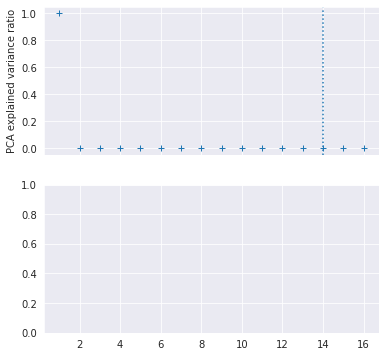

In [43]:
pca = PCA()
robust = RobustScaler()

svm_model = SVC()

pipe = Pipeline(steps=[("robust", robust), ("pca", pca), ("svm", svm_model)])

svm_parameters = {'kernel': ['rbf'],
                  'C': [0.01, 0.1, 1 , 10, 100],
                  'gamma': [0.01, 0.1, 1, 10, 100]
}

param_grid = {
    "pca__n_components": [6, 8, 10, 12, 14, 16],
    "svm__C": [0.01, 0.1, 1 , 10, 100],
    "svm__kernel": ['rbf'],
    "svm__gamma": [0.01, 0.1, 1, 10, 100]
}

svm_gs = GridSearchCV(pipe, param_grid = param_grid, n_jobs=2)

svm_gs.fit(X, y)
print("Best parameter (CV score=%0.3f):" % svm_gs.best_score_)
print(svm_gs.best_params_)

pca.fit(X)


In [ ]:
test_data

In [54]:
y_test = pd.read_csv("https://raw.githubusercontent.com/lauren-safwat/Dry-Beans-Classification/main/dataset/test_labelled.csv?token=GHSAT0AAAAAABT3JWLQODZJUHLXVF4335ISYUC47HA", index_col="ID")

In [ ]:
y_test.y = label_encoder.transform(y_test.y)
y_test

In [ ]:
y_test.head(20)

In [59]:
svm_gs.score(test_data, y_test)

0.9582871908453304